# IE582 Homework 2
## Fatih Kubilay Yavuz

## Importing necessary packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context("paper")
sns.set_style("darkgrid")
import numpy as np
from mpl_toolkits import mplot3d

# Part 1

### Reading the data


In [2]:
musk_=pd.read_csv("Musk1.csv",header=None)
musk_.columns=["bag_class","bag_id"]+["feature_"+str(i) for i in list(range(1,len(musk_.columns)-1))]
musk_.head()

,bag_class,bag_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


### Scaling the data in order to execute PCA and MDS

In [3]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
musk_scaled=musk_.copy()
musk_scaled.iloc[:,2:]=scaler.fit_transform(musk_.iloc[:,2:])
musk_scaled.head()

,bag_class,bag_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166
0,1,1,0.180913,-0.882527,-0.430628,-1.205030,-0.163966,0.225832,0.372274,-1.264914,...,-0.258452,1.457495,-0.170444,-1.446426,-0.864767,-1.010863,-0.787632,-0.179463,0.556386,-0.068615
1,1,1,0.180913,-0.803181,-0.908198,-1.072468,-0.163966,0.704464,0.616523,-2.348040,...,-0.258452,-1.090779,1.382981,-1.446426,-0.876232,-0.990545,-0.787632,-0.179463,0.539129,-0.068615
2,1,1,0.180913,-0.803181,-0.908198,-1.205030,-0.163966,0.225832,0.616523,-2.229160,...,-0.258452,1.468672,-0.154006,-1.446426,-0.864767,-1.010863,-0.787632,-0.179463,0.539129,-0.050142
3,1,1,0.180913,-0.882527,-0.445100,-1.072468,-0.163966,0.704464,0.372274,-1.357376,...,-0.258452,-1.090779,1.382981,-1.446426,-0.876232,-1.010863,-0.787632,-0.179463,0.556386,-0.068615
4,1,2,0.180913,-0.882527,-0.329325,-1.205030,-0.163966,0.214954,0.381668,-1.251705,...,-0.258452,1.468672,-0.154006,1.163490,1.038376,1.305388,-0.893034,0.257970,0.694440,-0.142508


### 1.a) Applying PCA and MDS

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(musk_scaled.values[:,2:])
principal_df = pd.DataFrame(data = principal_components,columns=["pc"+str(i) for i in range(1,167)])
principal_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc157,pc158,pc159,pc160,pc161,pc162,pc163,pc164,pc165,pc166
0,0.787850,8.664480,2.433177,-8.109256,0.140986,-2.405274,-3.270312,-2.071979,1.298017,0.190015,...,0.007543,-0.013526,0.014519,-0.024674,-0.017464,-0.001812,-0.002813,-0.005190,0.000657,0.020014
1,0.782505,8.544104,2.636037,-7.014406,1.095515,-1.003332,-1.930490,-3.730391,-2.053357,0.231909,...,-0.006991,0.020445,0.019475,-0.009235,0.011180,0.008855,0.004708,-0.030824,0.013715,-0.014772
2,0.248081,8.360294,2.454432,-8.106509,0.831239,-1.724215,-2.348840,-2.719549,-0.212979,-1.345179,...,0.002031,0.000701,-0.003512,-0.014265,-0.004289,0.006144,0.012507,-0.016620,0.007936,0.001630
3,1.356422,9.106098,2.639127,-7.042917,0.458120,-1.659686,-2.814254,-3.161062,-0.602714,1.735087,...,0.012054,0.012064,-0.000427,-0.000049,-0.011664,0.003368,0.002310,-0.003612,0.015828,0.009178
4,1.459051,8.685006,-0.016682,-8.001193,2.830049,-1.576117,-0.336930,-0.404053,1.770947,-0.086806,...,0.026580,-0.003757,0.005568,-0.006953,0.014492,-0.018932,-0.025934,0.002795,-0.010131,0.014194


In [5]:
from sklearn.manifold import MDS

embedding=MDS(n_components=3)
mds_df=embedding.fit_transform(musk_scaled.values[:,2:])
mds_df = pd.DataFrame(data = mds_df
             , columns = ['mds_'+str(i) for i in range(1,4)])
mds_df.head()

,mds_1,mds_2,mds_3
0,-4.311644,-12.337731,2.615447
1,-3.650745,-12.146252,2.833798
2,-3.838856,-12.123762,1.952023
3,-3.958147,-12.478430,3.651624
4,-0.915753,-11.228936,5.837437


In [6]:
mds_df["bag_class"]=musk_["bag_class"]
principal_df["bag_class"]=musk_["bag_class"]

The first component of pca has value of 50 percent. So, this component explains only 50 percent of the data.
The first three component has nearly explained 80 percent of the data. So, I'll compare these components.

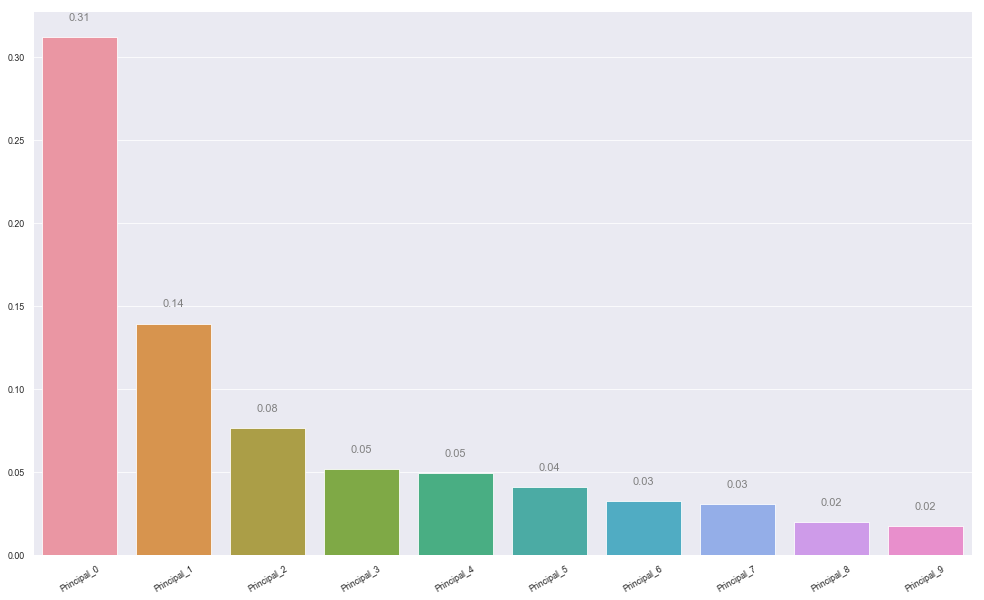

In [7]:
plt.figure(figsize=(15,10))
g=sns.barplot(x=["Principal_"+str(i) for i in range(10)],y=pca.explained_variance_ratio_[:10],)
g.set_xticklabels(labels=["Principal_"+str(i) for i in range(10)],rotation=30)
ax=g
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

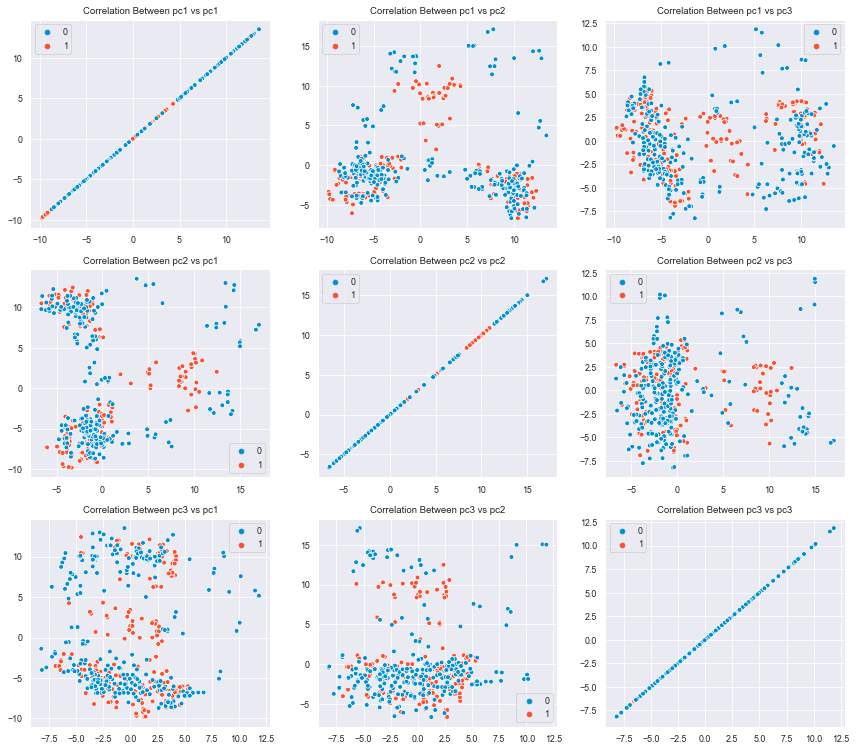

In [8]:
fig,ax=plt.subplots(3,3,figsize=(13,13))
for i in range(3):
    for j in range(3):
        g=sns.scatterplot(x=principal_df.values[:,i],y=principal_df.values[:,j],ax=ax[i,j],hue=principal_df["bag_class"].values)
        g.set_title("Correlation Between {} vs {}".format(principal_df.columns[i],principal_df.columns[j]))

As expected, there seems to be no correlation whatsoever.
Let's look at the plot of these 3 in one plot.

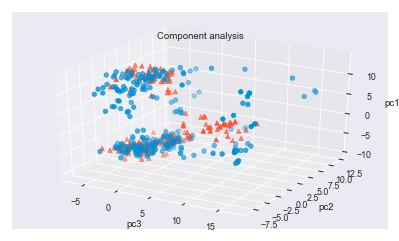

In [9]:
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
for i,j in [(0,"o"),(1,"^")]:
    new_df=principal_df[principal_df["bag_class"]==i]
    zdata = new_df["pc1"]
    xdata = new_df["pc2"]
    ydata = new_df["pc3"]
    ax.set_xlabel('pc3')
    ax.set_ylabel('pc2')
    ax.set_zlabel('pc1')
    ax.scatter3D(xdata, ydata, zdata,marker=j)
    ax.set_title('Component analysis')
plt.show()

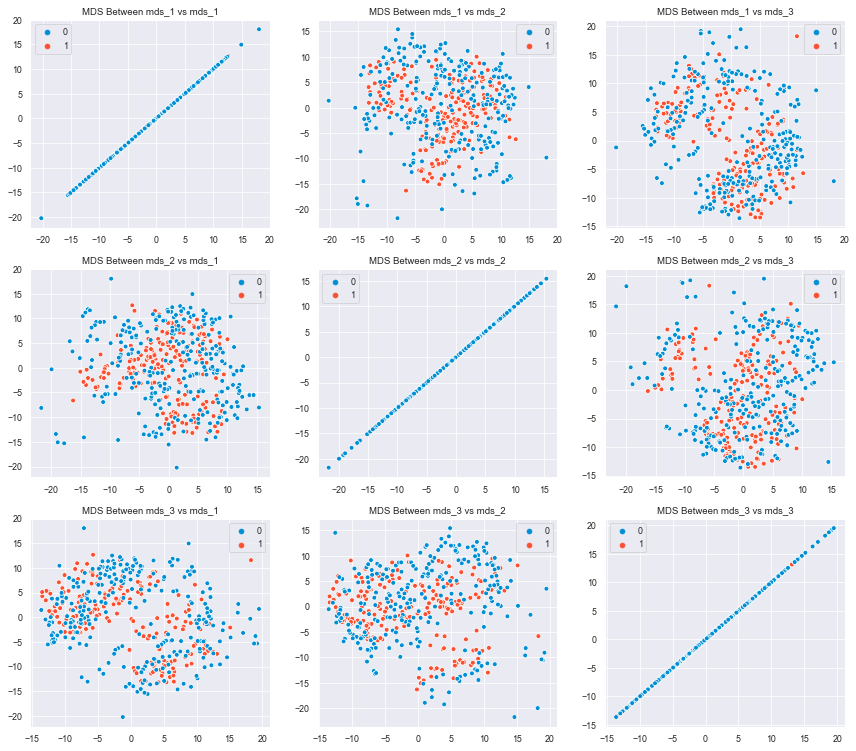

In [10]:
fig,ax=plt.subplots(3,3,figsize=(13,13))
for i in range(3):
    for j in range(3):
        g=sns.scatterplot(x=mds_df.values[:,i],y=mds_df.values[:,j],ax=ax[i,j],hue=mds_df["bag_class"].values)
        g.set_title("MDS Between {} vs {}".format(mds_df.columns[i],mds_df.columns[j]))

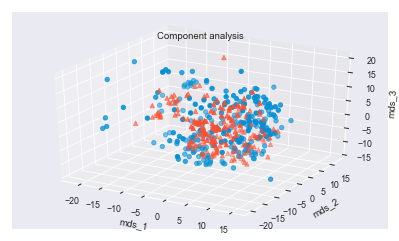

In [11]:
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
for i,j in [(0,"o"),(1,"^")]:
    new_df=mds_df[mds_df["bag_class"]==i]
    zdata = new_df["mds_3"]
    xdata = new_df["mds_2"]
    ydata = new_df["mds_1"]
    ax.set_xlabel('mds_1')
    ax.set_ylabel('mds_2')
    ax.set_zlabel('mds_3')
    ax.scatter3D(xdata, ydata, zdata,marker=j)
    ax.set_title('Component analysis')

plt.show()

### 2.b) Grouping the data respect to their bag id's

In [12]:
musk_agg=musk_scaled.groupby("bag_id").mean()
musk_agg=musk_agg.reset_index()
musk_agg.bag_class=musk_agg.bag_class.astype(int)
musk_agg.head()

,bag_id,bag_class,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166
0,1,1,0.180913,-0.842854,-0.673031,-1.138749,-0.163966,0.465148,0.494398,-1.799872,...,-0.258452,0.186152,0.610378,-1.446426,-0.870500,-1.005783,-0.787632,-0.179463,0.547758,-0.063997
1,2,1,0.180913,-0.842854,-0.618761,-1.138749,-0.163966,0.465148,0.496747,-1.793268,...,-0.258452,0.202917,0.622707,1.163490,1.021179,1.295229,-0.898304,0.242347,0.694440,-0.133272
2,3,1,0.180913,-0.519801,-0.336561,-0.615131,-0.146529,0.160565,0.414548,-1.984796,...,-0.218742,1.641910,0.515857,0.583508,0.952391,1.092049,-0.629530,0.101744,0.487359,-0.318005
3,4,1,0.217809,-0.391335,0.027646,-0.771995,-0.163966,0.349116,0.359748,-1.846103,...,-0.247863,0.697484,0.766543,-0.841007,-0.815087,-0.983772,-0.738445,-0.262784,0.544882,-0.025511
4,5,1,1.260113,0.540042,-0.329325,-0.545536,2.730564,0.312856,0.428639,-1.998005,...,-0.254481,0.974106,0.392570,0.461407,0.439344,1.158083,-0.355486,0.461064,0.448531,0.056080


In [13]:
emb_agg=MDS(n_components=3)
pca_agg=PCA()
mds_agg_df=emb_agg.fit_transform(musk_agg.iloc[:,2:])
pca_agg_df=pca_agg.fit_transform(musk_agg.iloc[:,2:])
mds_agg_df = pd.DataFrame(data = mds_agg_df
             , columns = ['mds_'+str(i) for i in range(1,mds_agg_df.shape[1]+1)])
pca_agg_df = pd.DataFrame(data = pca_agg_df
             , columns = ['pca_'+str(i) for i in range(1,pca_agg_df.shape[1]+1)])

In [14]:
mds_agg_df["bag_class"]=musk_agg["bag_class"]
pca_agg_df["bag_class"]=musk_agg["bag_class"]

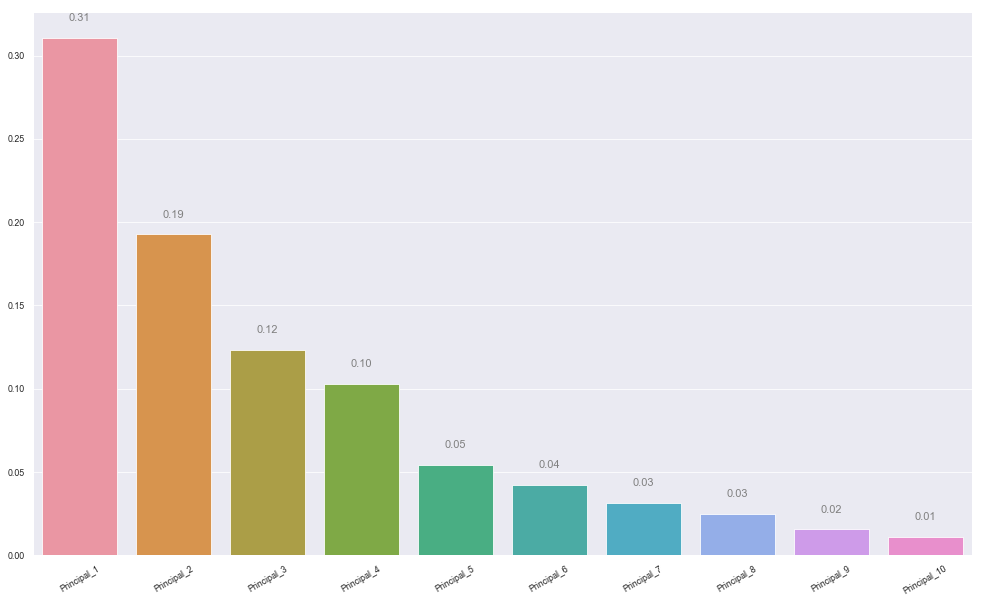

In [15]:
plt.figure(figsize=(15,10))
g=sns.barplot(x=["Principal_"+str(i) for i in range(1,11)],y=pca_agg.explained_variance_ratio_[:10],)
g.set_xticklabels(labels=["Principal_"+str(i) for i in range(1,11)],rotation=30)
ax=g
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

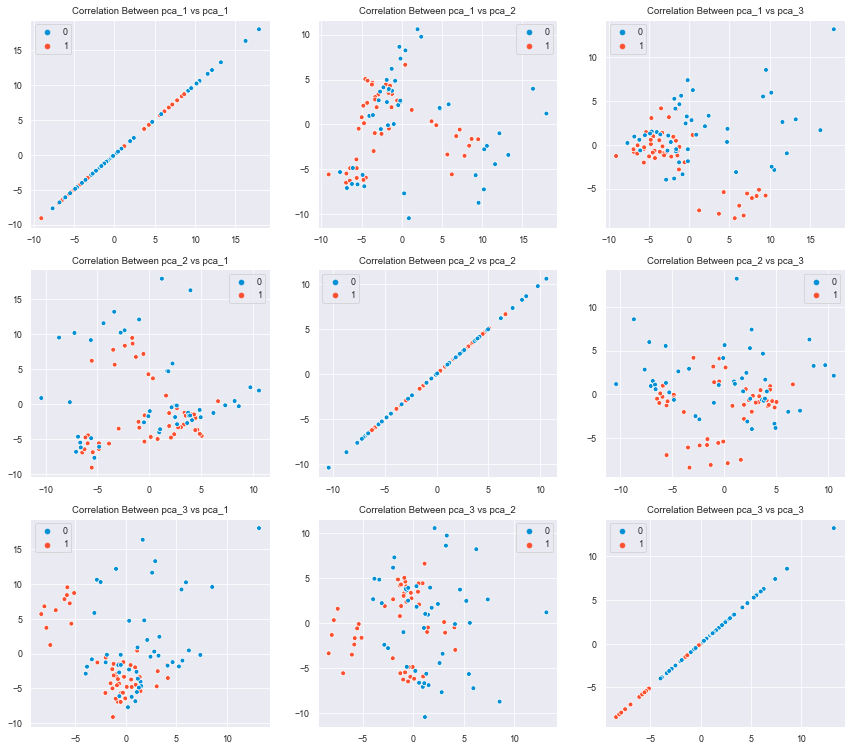

In [16]:
fig,ax=plt.subplots(3,3,figsize=(13,13))
for i in range(3):
    for j in range(3):
        g=sns.scatterplot(x=pca_agg_df.values[:,i],y=pca_agg_df.values[:,j],ax=ax[i,j],hue=pca_agg_df["bag_class"].values)
        g.set_title("Correlation Between {} vs {}".format(pca_agg_df.columns[i],pca_agg_df.columns[j]))

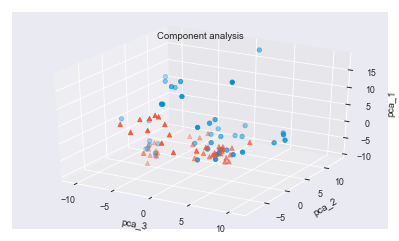

In [17]:
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
for i,j in [(0,"o"),(1,"^")]:
    new_df=pca_agg_df[pca_agg_df["bag_class"]==i]
    zdata = new_df["pca_1"]
    xdata = new_df["pca_2"]
    ydata = new_df["pca_3"]
    ax.set_xlabel('pca_3')
    ax.set_ylabel('pca_2')
    ax.set_zlabel('pca_1')
    ax.scatter3D(xdata, ydata, zdata,marker=j)
    ax.set_title('Component analysis')
plt.show()

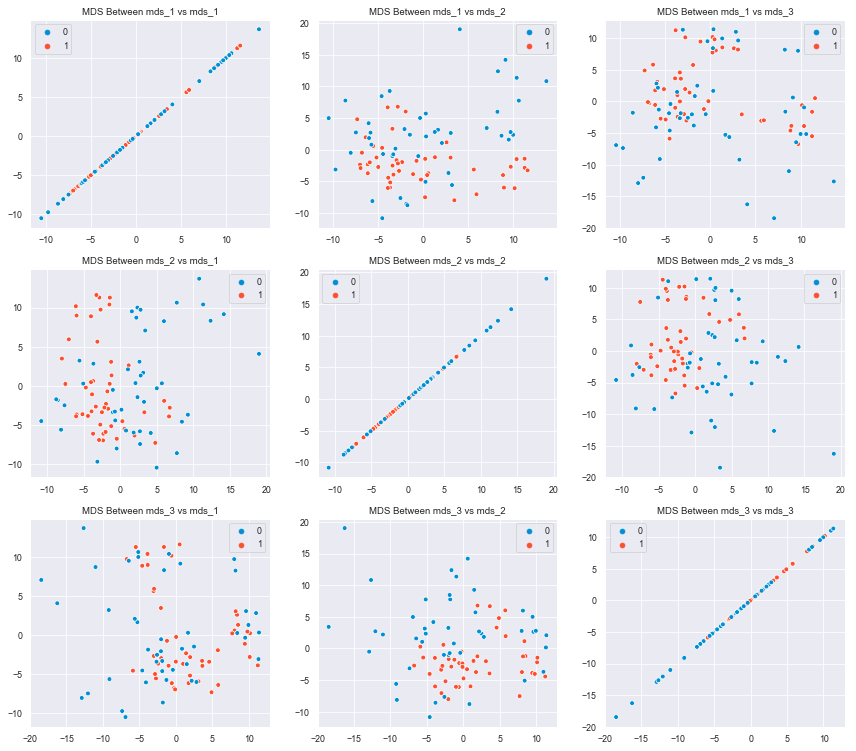

In [18]:
fig,ax=plt.subplots(3,3,figsize=(13,13))
for i in range(3):
    for j in range(3):
        g=sns.scatterplot(x=mds_agg_df.values[:,i],y=mds_agg_df.values[:,j],ax=ax[i,j],hue=mds_agg_df["bag_class"].values)
        g.set_title("MDS Between {} vs {}".format(mds_agg_df.columns[i],mds_agg_df.columns[j]))

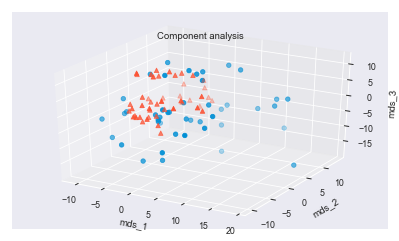

In [19]:
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
for i,j in [(0,"o"),(1,"^")]:
    new_df=mds_agg_df[mds_agg_df["bag_class"]==i]
    zdata = new_df["mds_3"]
    xdata = new_df["mds_2"]
    ydata = new_df["mds_1"]
    ax.set_xlabel('mds_1')
    ax.set_ylabel('mds_2')
    ax.set_zlabel('mds_3')
    ax.scatter3D(xdata, ydata, zdata,marker=j)
    ax.set_title('Component analysis')

plt.show()

In [20]:
#bonus soru here

# Task 2

In [21]:
import cv2

## 1) Reading Image, Resizing and Displaying

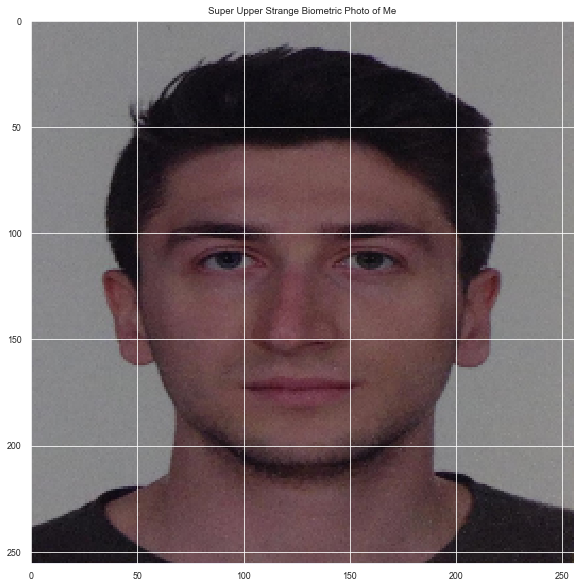

In [22]:
pic=cv2.imread("vesikalik_me.jpeg")
pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
pic=cv2.resize(pic,(256,256))
fig,ax=plt.subplots(1,figsize=(10,10))
ax.set_title("Super Upper Strange Biometric Photo of Me")
ax.imshow(pic,cmap="gray")

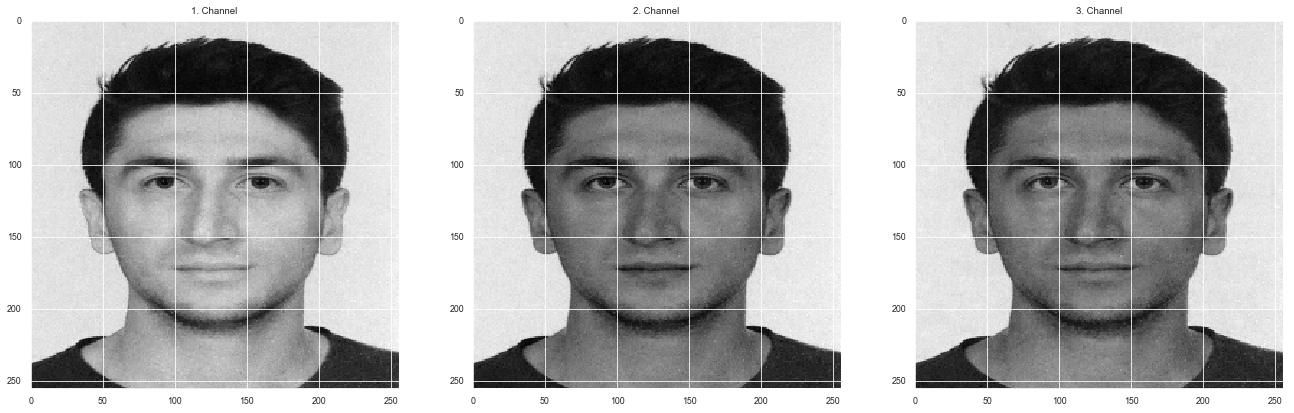

In [23]:
fig,ax=plt.subplots(1,3,figsize=(20,15))
for i in range(3):
    ax[i].set_title("{}. Channel".format(i+1))
    ax[i].imshow(pic[:,:,i],cmap="gray")

## 2) Adding random noise to the image
### 2.a) Displaying the noisy image

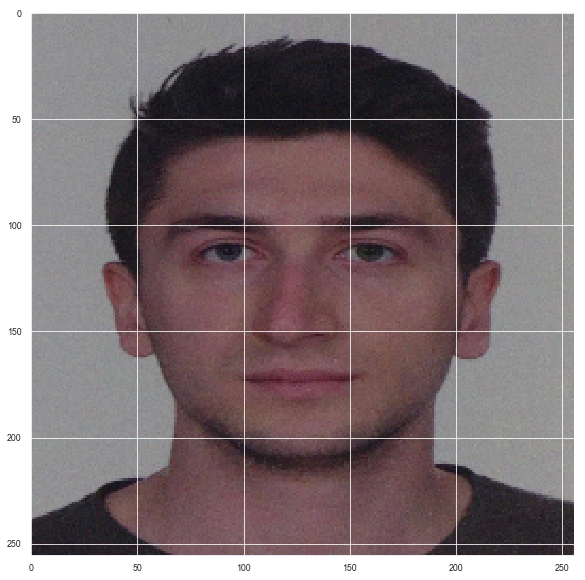

In [24]:
noise=np.random.uniform(pic.min(),pic.max()/10,size=pic.size).astype(int)
noise=noise.reshape(pic.shape)
pic_noisy=pic+noise
plt.figure(figsize=(10,10))
plt.imshow(pic_noisy)
pic_noisy=pic_noisy.astype("uint8")

### 2.b) Displaying the channels of the noisy image 

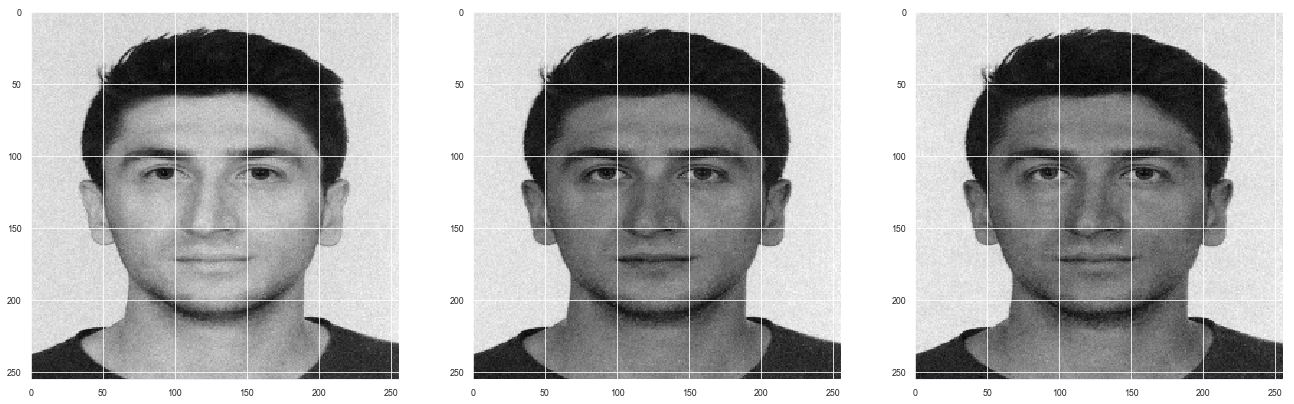

In [25]:
fig,ax=plt.subplots(1,3,figsize=(20,15))
for i in range(3):
    ax[i].imshow(pic_noisy[:,:,i],cmap="gray")

## 3) Transform the noisy image to grayscale and display it, then create 25x25 patches

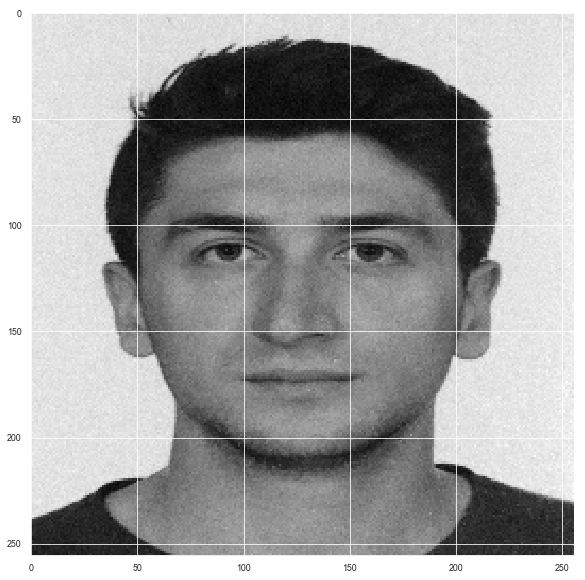

In [26]:
pic_noisy_g=cv2.cvtColor(pic_noisy,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(15,10))
plt.imshow(pic_noisy_g,cmap="gray")

Image shape: (256, 256)
Patches shape: (53824, 25, 25)


c:\python\python36\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


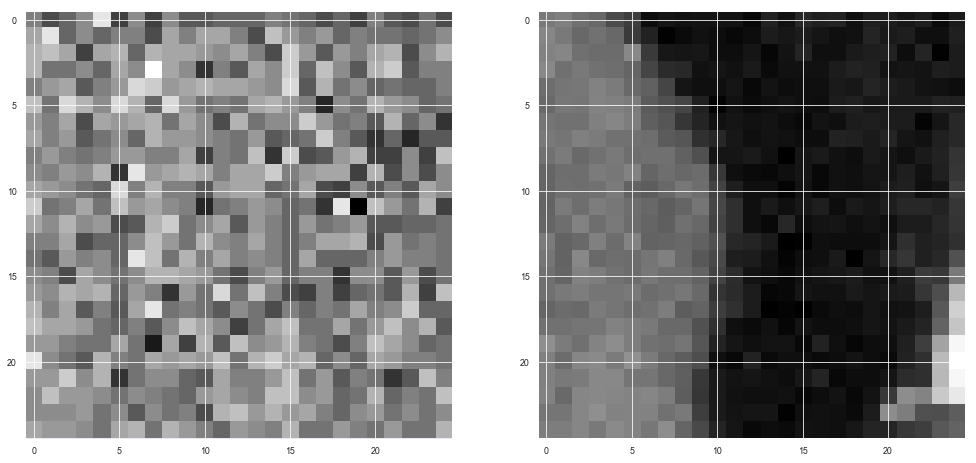

In [27]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
print('Image shape: {}'.format(pic_noisy_g.shape))
patches = image.extract_patches_2d(pic_noisy_g, (25, 25))
print('Patches shape: {}'.format(patches.shape))
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(patches[1],cmap="gray")
ax[1].imshow(patches[22000],cmap="gray");

## 3.a) Applying PCA to the scaled image

In [28]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler_ben = StandardScaler()
patches=patches.reshape((53824,625))
patches=scaler.fit_transform(patches)

c:\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
pic_pca=PCA()
patches_pca=pic_pca.fit_transform(patches)
patches_pca=pd.DataFrame(patches_pca)
patches_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,-31.148432,-1.430587,0.365774,-0.708630,1.928096,0.523595,0.187206,0.206805,0.014214,-0.177738,...,-0.120418,0.024418,0.046372,0.033189,-0.126319,0.045022,-0.064525,-0.087828,0.122396,0.070305
1,-31.133756,-1.443091,0.406330,-0.689236,1.979616,0.548129,0.178176,0.214465,0.009296,-0.152262,...,0.089975,-0.053446,-0.071426,-0.009221,0.107061,0.065443,0.054720,0.101915,-0.116269,-0.061054
2,-31.088209,-1.452420,0.338841,-0.677163,1.998033,0.532473,0.153855,0.238519,0.102341,-0.076572,...,-0.056073,0.093854,0.087636,0.018985,-0.015553,-0.126340,-0.039342,-0.121754,0.097340,0.070074
3,-31.067998,-1.446379,0.329036,-0.685606,2.040629,0.561533,0.095144,0.283383,0.100274,-0.004533,...,0.015889,-0.123010,-0.066358,-0.059062,-0.078448,0.132259,0.018969,0.129796,-0.074448,-0.069051
4,-31.009069,-1.447819,0.332142,-0.677899,2.026218,0.544378,0.115121,0.233318,0.108984,0.027568,...,0.055652,0.139404,0.011996,0.095299,0.113669,-0.090591,0.019484,-0.126499,0.049707,0.053593


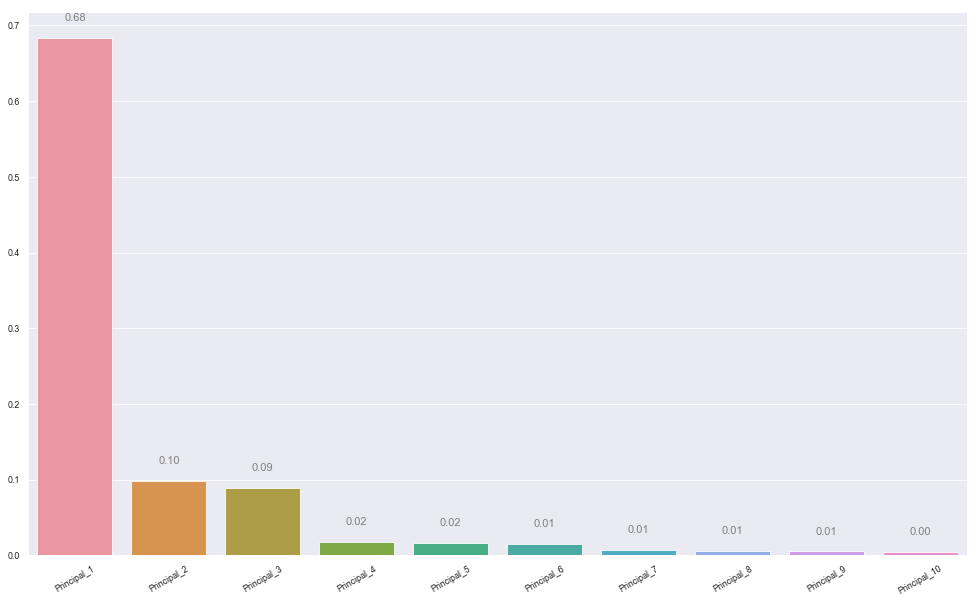

In [30]:
plt.figure(figsize=(15,10))
g=sns.barplot(x=["Principal_"+str(i) for i in range(1,11)],y=pic_pca.explained_variance_ratio_[:10],)
g.set_xticklabels(labels=["Principal_"+str(i) for i in range(1,11)],rotation=30)
ax=g
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

### 3.b) Plotting the first, second and third scores of the image

Here you can see the components of my face. With these we can easily recreate my face. 

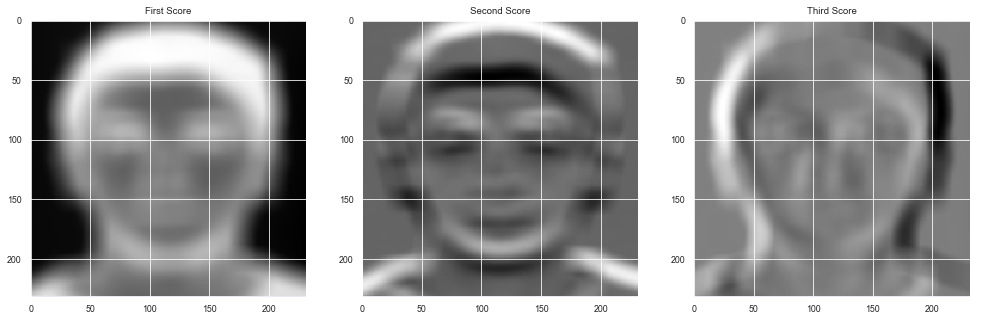

In [31]:
fig,ax=plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(patches_pca[0].values.reshape((232,232)),cmap="gray")
ax[1].imshow(patches_pca[1].values.reshape((232,232)),cmap="gray")
ax[2].imshow(patches_pca[2].values.reshape((232,232)),cmap="gray")
ax[0].set_title("First Score")
ax[1].set_title("Second Score")
ax[2].set_title("Third Score");

### 3.c) Plotting the components of the PCA applied image

My opinion is the information decreases going from black to white. In the first component, we see blacks in the middle of the picture. This may be so because, every patch has an important information on the middle. Our assumption matches with the explained variance being high. 

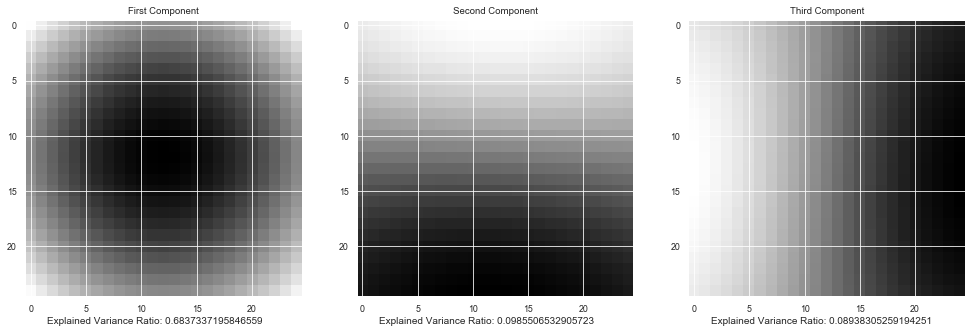

In [32]:
fig,ax=plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(pic_pca.components_[0].reshape((25,25)),cmap="gray")
ax[1].imshow(pic_pca.components_[1].reshape((25,25)),cmap="gray")
ax[2].imshow(pic_pca.components_[2].reshape((25,25)),cmap="gray")
ax[0].set_title("First Component")
ax[1].set_title("Second Component")
ax[2].set_title("Third Component")
ax[0].text(1.5, 27, "Explained Variance Ratio: {}".format(pic_pca.explained_variance_ratio_[0]))
ax[1].text(1.5, 27, "Explained Variance Ratio: {}".format(pic_pca.explained_variance_ratio_[1]))
ax[2].text(1.5, 27, "Explained Variance Ratio: {}".format(pic_pca.explained_variance_ratio_[2]));